#                                   RentTheRunWay

# ● Import the required libraries and load the data

### 1. Load the required libraries and read the dataset.

In [2]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [3]:
df=pd.read_csv("renttherunway.csv")


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [4]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [5]:
df.shape

(192544, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [7]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [8]:
# Percentage of null values in a specific column of the dataset

df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

# ● Data cleansing and Exploratory data analysis

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [9]:
len(df[df.duplicated()])

0

No duplicate records.

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [10]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [11]:
df=df.drop(['Unnamed: 0', 'user_id', 'item_id','review_text', 'review_summary','review_date'],axis=1)

In [12]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [13]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [14]:
df['weight']=pd.to_numeric(df['weight'].str.replace('lbs',''))

In [15]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

In [16]:
df.weight.fillna(0,inplace=True)

In [17]:
df['weight']

0         137.0
1         132.0
2           0.0
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (

In [18]:
df[ 'rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [19]:
df['rented for'] =df['rented for'].replace(['party', 'party: cocktail' ], 'party' )


In [20]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [21]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [22]:
df['height']=df['height'].str.replace('"','')


In [23]:
df['height']

0         5' 8
1         5' 6
2         5' 4
3         5' 5
4         5' 9
          ... 
192539    5' 9
192540    5' 1
192541    5' 8
192542    5' 6
192543    5' 6
Name: height, Length: 192544, dtype: object

In [24]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (
    df.height.str.split("'").str[1].astype(float)
)
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [25]:
df.isnull().sum()/len(df) * 100

fit           0.000000
bust size     9.561970
weight        0.000000
rating        0.042588
rented for    0.005194
body type     7.601899
category      0.000000
height        0.351608
size          0.000000
age           0.498587
dtype: float64

In [26]:
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [27]:
df.isnull().sum()/len(df) * 100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings. 

In [28]:
df.describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,115.997751,9.092758,65.309529,12.245175,33.861689
std,53.726993,1.429862,2.658857,8.494877,8.039050
min,0.000000,2.000000,54.000000,0.000000,0.000000
25%,115.000000,8.000000,63.000000,8.000000,29.000000
50%,130.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


The average weight of the customer is around 137lbs.
The average rating is around 9.
The maximum height of the customer is 78 inches.
The maximum standarized size of the product is 58.
The age range is 0 to 117.

In [29]:
df.describe(include='O')

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

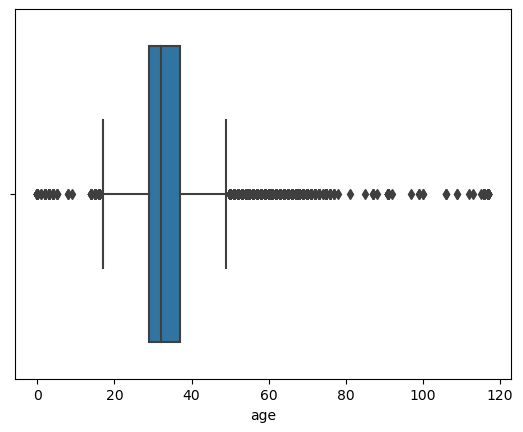

In [30]:
sns.boxplot(df['age'])
plt.show()

In [31]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

29.0
37.0
8.0


In [32]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [33]:
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

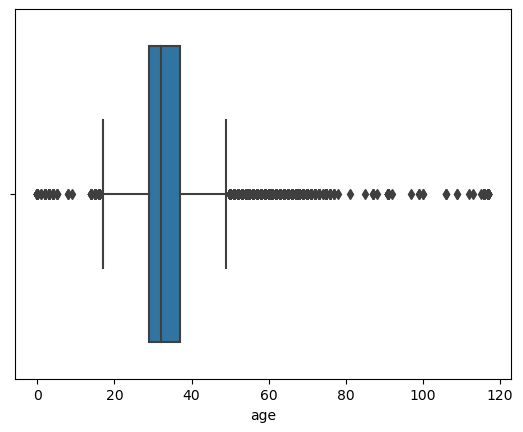

In [34]:
sns.boxplot(df['age'])
plt.show()

In [35]:
df.dropna(inplace=True)

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

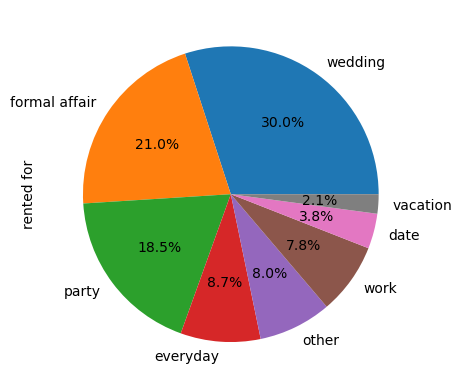

In [36]:
df['rented for'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

# ● Data Preparation for model building:

### 12. Encode the categorical variables in the dataset

In [37]:
df1=df

In [38]:
df1.select_dtypes('object').columns

Index(['fit', 'bust size', 'rented for', 'body type', 'category'], dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
for col in df1.select_dtypes('object').columns:
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[col])

In [40]:
df1

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,0.0,10.0,4,3,45,64.0,4,116.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,0,41,140.0,10.0,7,3,26,69.0,8,42.0
192540,0,25,100.0,10.0,7,5,16,61.0,4,29.0
192541,0,48,135.0,6.0,1,6,16,68.0,8,31.0
192542,0,51,165.0,10.0,6,4,16,66.0,16,31.0


### 13. Standardize the data, so that the values are within a particular range.

In [41]:
ds=df.select_dtypes(include=['int64','float64'])
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds =pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [42]:
scaled_ds

,weight,rating,height,size,age
0,0.390908,0.634498,1.011893,0.206575,-0.729154
1,0.297845,0.634498,0.259688,-0.028862,0.265991
2,-2.159027,0.634498,-0.492517,-0.970608,10.217442
3,0.353683,-0.764242,-0.116415,-0.499735,0.017205
4,0.539809,0.634498,1.387995,-0.028862,-0.853547
...,...,...,...,...,...
192539,0.446746,0.634498,1.387995,-0.499735,1.012350
192540,-0.297761,0.634498,-1.620824,-0.970608,-0.604761
192541,0.353683,-2.162982,1.011893,-0.499735,-0.355974
192542,0.912063,0.634498,0.259688,0.442012,-0.355974


# ● Principal Component Analysis and Clustering:

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [42]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_ds.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519 -0.01067186  0.09999958  0.08772758  0.06137198]
 [-0.01067186  1.00000519  0.00174836 -0.03672869 -0.03513107]
 [ 0.09999958  0.00174836  1.00000519  0.22842543 -0.00728095]
 [ 0.08772758 -0.03672869  0.22842543  1.00000519  0.15512023]
 [ 0.06137198 -0.03513107 -0.00728095  0.15512023  1.00000519]]


In [43]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[-0.39274891  0.08859475 -0.10206895 -0.90407675  0.10063016]
 [ 0.11636651  0.04571497 -0.63715251  0.10962975  0.75258685]
 [-0.53764259 -0.59690653 -0.47136023  0.19400967 -0.30793314]
 [-0.6409564   0.68495649  0.00105386  0.34633124  0.00794109]
 [-0.36376155 -0.40570718  0.60119633  0.11419924  0.57323706]]


Eigen values: 
 [1.34007031 0.71795973 1.03279831 0.93848125 0.97071637]


In [44]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [26.801267057576922, 20.655859011278014, 19.414226474994734, 18.76952747785234, 14.35911997829798]
Cummulative Variance Explained:  [ 26.80126706  47.45712607  66.87135254  85.64088002 100.        ]


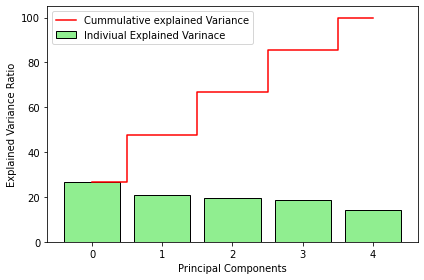

In [46]:
## Scree plot
plt.bar(range(5),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(5), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)


In [45]:
## Fitting the PCA model
pca=PCA(n_components = 5)
pca.fit(scaled_ds)

PCA(n_components=5)

In [46]:
data_pca = pca.transform(scaled_ds)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca1=data_pca.head(10000)

In [47]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=8)
    clusters.fit(data_pca1)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,49379.159894
1,2,40342.435257
2,3,33281.109002
3,4,28772.203453
4,5,24868.656403
5,6,22462.435266
6,7,20912.962257
7,8,19544.127551
8,9,18533.624220
9,10,17659.651478


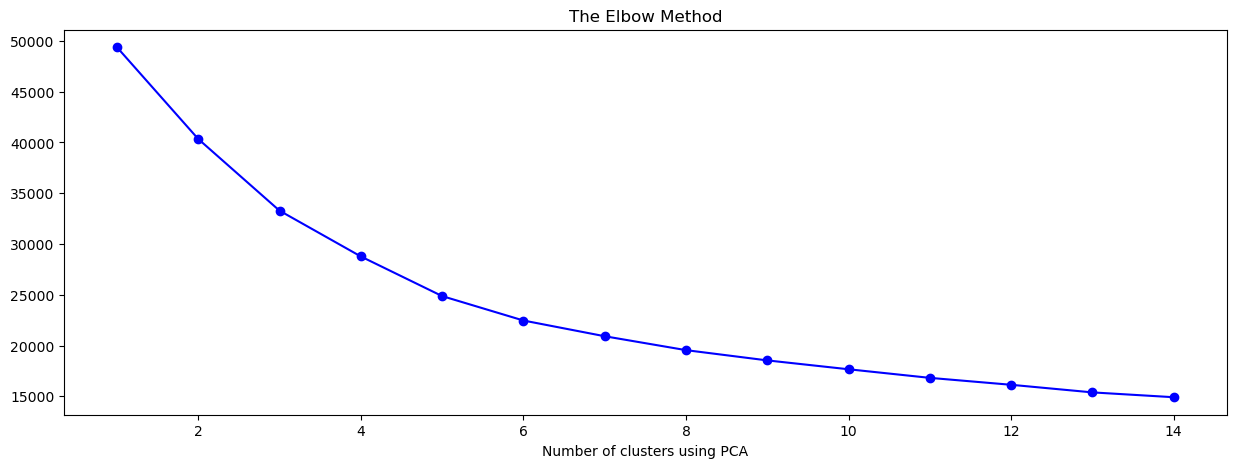

In [48]:
# Elbow method
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

In [49]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=15, random_state=100)
kmeans.fit(data_pca1)

KMeans(n_clusters=3, n_init=15, random_state=100)

In [50]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [51]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
kmeans_df=data_pca.join(df_labels)
kmeans_df.head(5)

,PC1,PC2,PC3,PC4,PC5,Labels
0,0.490898,-1.359284,-0.211081,-0.099259,0.103049,1.0
1,0.261021,-0.397196,0.579767,-0.128952,0.227299,1.0
2,1.908007,6.189917,6.261222,2.756605,4.678400,1.0
3,-0.148799,0.515529,-0.497825,-0.597234,0.283391,0.0
4,0.555434,-1.626795,-0.385088,-0.256655,0.425152,1.0


In [52]:
kmeans_df['Labels'].value_counts()

0.0    4756
1.0    3692
2.0    1552
Name: Labels, dtype: int64

In [53]:
from sklearn.metrics import silhouette_score
kmeans_score = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca1)
    labels = kmeans.predict(data_pca1)
    print(i,silhouette_score(data_pca1,labels))

2 0.318476694651455
3 0.22698037903174728
4 0.22376516825098747
5 0.23160791741489656
6 0.23631796951192574
7 0.23009305032601668
8 0.22945463154671192
9 0.207918718571727


### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 

In [54]:
## Taking a sample of 50K rows from the df1 dataframe using random sampling technique provided by pandas 

## Storing it in the new dataframe called 'df2' 
df2 =data_pca1

## reseting the index
df2.reset_index(inplace=True,drop=True)

In [55]:
df2.head(4)

,PC1,PC2,PC3,PC4,PC5
0,0.490898,-1.359284,-0.211081,-0.099259,0.103049
1,0.261021,-0.397196,0.579767,-0.128952,0.227299
2,1.908007,6.189917,6.261222,2.756605,4.678400
3,-0.148799,0.515529,-0.497825,-0.597234,0.283391


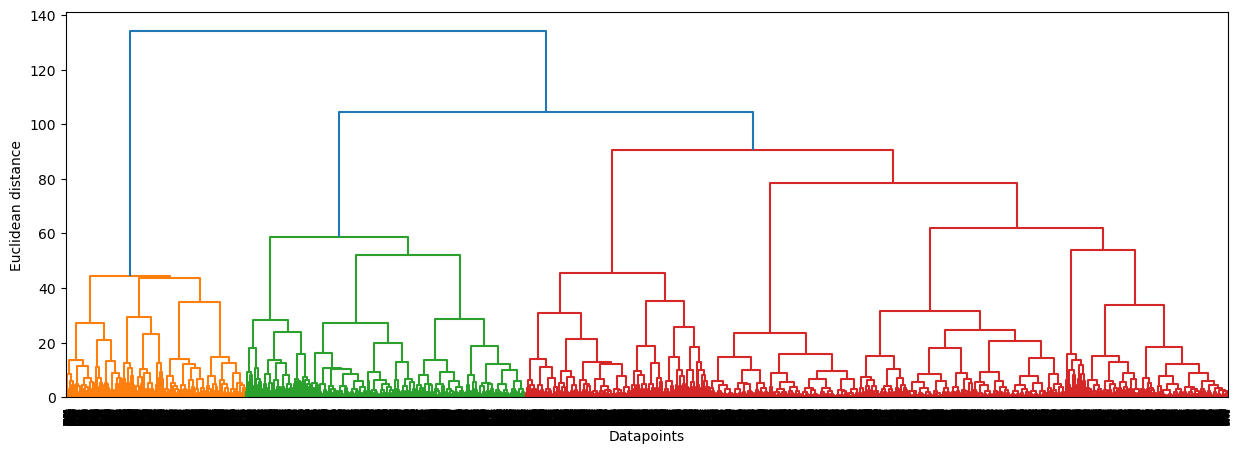

In [56]:
plt.figure(figsize=[15,5])
merg = linkage(df2, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [57]:
## Building hierarchical clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(df2)

In [58]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,0
2,0
3,2
4,0


In [59]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df2)
    labels = hier.fit_predict(df2)
    print(i,silhouette_score(df2,labels))

2 0.3172369124650898
3 0.21274185692802836
4 0.21420462274086882
5 0.1497058390135522
6 0.14691311342719848
7 0.15884965773381796
8 0.15752784905679296
9 0.16970879957453047
10 0.17276487396943563
11 0.17423401827396484
12 0.17767713099771776
13 0.1781397987922773
14 0.1737556582744319


We can therefore conclude from the silhouette scores for the agglomerative clustering for the 2nd cluster the silhouette score is higher.

# ● Conclusion :

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. 

In [60]:
## joining the label dataframe with unscaled initial cleaned dataframe.

df_hier = df.join(df_label1)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0,0.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0,0.0
2,0,37,0.0,10.0,4,3,45,64.0,4,116.0,0.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0,2.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0,0.0


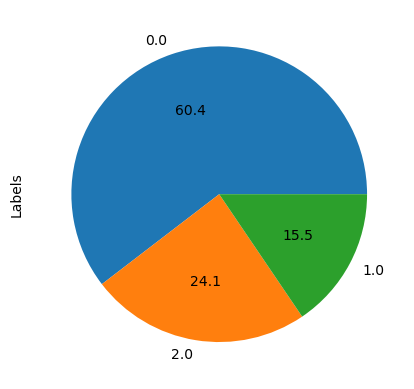

In [61]:
df_hier['Labels'].value_counts().plot(kind='pie',autopct='%0.1f')
plt.show()

We can clearly observe here that the clusters formed are imbalanced. There are more number of records assigned to cluster 0 than that of cluster 1 altogather.

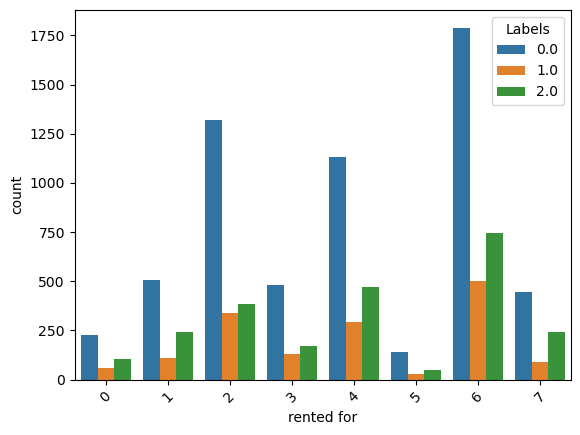

In [62]:
sns.countplot(df_hier['rented for'],hue='Labels',data=df_hier)
plt.xticks(rotation = 45)
plt.show()

We can observe that the users who have rented the product is more  for 'wedding' and there are more number of users belong to the cluster 0 compare to the cluster 1.

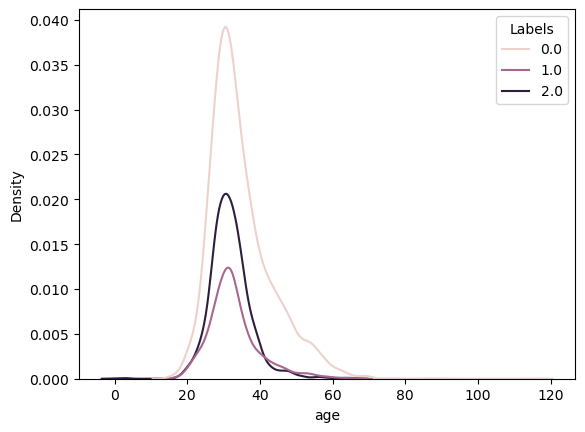

In [63]:
## Lets check the age distribution of the different clusters.
sns.kdeplot(df_hier['age'],hue='Labels',data=df_hier)
plt.show()

The density at age between 20 and 40 is heighestthough the distribution of the age for different clusters is almost same, since there are more numbers of observations assigned to the cluster 0.

In this project, we have attempted to implement and apply PCA on the renttherunway dataset and we selected 5 PCA compoments, which gave us the 90-95% of the variance in the data.

Time of computation is longer about 20 minutes, should be taken in consideration for getting the final result.

# Happy Learning:)